In [ ]:
import pandas as pd

def tot_degree(G):
    tot_deg = 0
    for i in range (0, len(G)):
        for j in range (0, len(G)):
            tot_deg += G.number_of_edges(i, j)
    return tot_deg

def avg_degree(G):
    avg_degree = tot_degree(G)/len(G)
    return avg_degree


def degrees(G):
    degrees = []
    for i in range(0, len(G)):
        degrees.append(G.degree(i))
    return degrees


df = pd.DataFrame(degrees(G), columns = ['Degrees'])
df = df.reindex(G.nodes())






In [ ]:
# Allow access to the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#BA WITH RANDOM INITIAL DISTRIBUTION

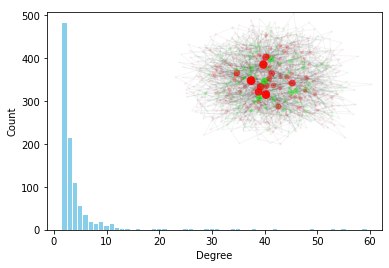

In [ ]:
import collections
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

G = nx.barabasi_albert_graph(1000, 2, seed = 21)

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color="skyblue")

#plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")

color_state_map = {'C': 'lime', 'D': 'red'}

df = pd.DataFrame(degrees(G), columns = ['Degrees'])
df = df.reindex(G.nodes())



states = np.random.choice(['C','D'], size=len(G.nodes()))
nx.set_node_attributes(G, dict(zip(G.nodes(), states)), 'state')






# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(G)
plt.axis("off")
nx.draw_networkx_nodes(G, pos, node_size=df['Degrees'], alpha = df['Degrees']/df['Degrees'].max(), 
                       node_color=[color_state_map[node[1]['state']] for node in G.nodes(data=True)])
nx.draw_networkx_edges(G, pos, alpha=0.04)

save_results_to = '/content/drive/My Drive/Colab Notebooks/NS_proj2_output_files/Final outputs/'
plt.savefig(save_results_to + 'BA_normal.png', dpi = 300)

plt.show()

#BA WITH INITIAL MODIFICATION

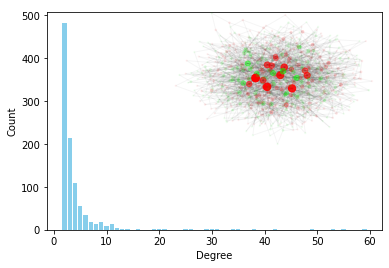

In [ ]:
import collections
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np


G = nx.barabasi_albert_graph(1000, 2, seed = 21)

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color="skyblue")


plt.ylabel("Count")
plt.xlabel("Degree")

#color_state_map = {'C': 'cyan', 'D': 'darkcyan'}
color_state_map = {'C': 'lime', 'D': 'red'}


df = pd.DataFrame(degrees(G), columns = ['Degrees'])
df = df.reindex(G.nodes())

  # Distribution strategy
  # Distribute 50% cooperators and 50% Defectors in the network
states = np.random.choice(['C','D'], size=len(G.nodes()))
nx.set_node_attributes(G, dict(zip(G.nodes(), states)), 'state')

  #Sort according to degree
sorted_degrees = sorted(G.degree, key=lambda x: x[1], reverse=True)

  #Make the first 50% detractors and the last 50% cooperators

for i in range(len(sorted_degrees)//100):    
  G.nodes[sorted_degrees[i][0]]['state'] = 'D'

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(G)
plt.axis("off")



nx.draw_networkx_nodes(G, pos, node_size=df['Degrees'], alpha = df['Degrees']/df['Degrees'].max(), 
                       node_color=[color_state_map[node[1]['state']] for node in G.nodes(data=True)])
nx.draw_networkx_edges(G, pos, alpha=0.04)

 
save_results_to = '/content/drive/My Drive/Colab Notebooks/NS_proj2_output_files/Final outputs/'
plt.savefig(save_results_to + 'BA_modified.png', dpi = 300)

plt.show()